In [2]:
import pandas as pd

# Reload the data
accidents_df = pd.read_csv('dft-road-casualty-statistics-accident-2019.csv')
casualties_df = pd.read_csv('dft-road-casualty-statistics-casualty-2019.csv')

# Merge the accidents and casualties dataframes
merged_df = pd.merge(accidents_df, casualties_df, how='inner', on='accident_index')

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Check the number of missing values in each column
missing_values = merged_df.isnull().sum()
missing_values

accident_index                                  0
accident_year_x                                 0
accident_reference_x                            0
location_easting_osgr                          42
location_northing_osgr                         42
longitude                                      42
latitude                                       42
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [6]:
# Descriptive statistics for numerical columns
numerical_stats = merged_df.describe()

# Frequency count for categorical columns
categorical_counts = merged_df.select_dtypes(include=['object']).apply(pd.Series.value_counts)

numerical_stats, categorical_counts

(       accident_year_x  location_easting_osgr  location_northing_osgr  \
 count         128593.0          128551.000000            1.285510e+05   
 mean            2019.0          447828.723067            2.954828e+05   
 std                0.0           91713.415080            1.548244e+05   
 min             2019.0           64084.000000            1.081400e+04   
 25%             2019.0          386827.000000            1.764320e+05   
 50%             2019.0          446856.000000            2.726770e+05   
 75%             2019.0          525588.000000            3.927670e+05   
 max             2019.0          655244.000000            1.167366e+06   
 
            longitude       latitude   police_force  accident_severity  \
 count  128551.000000  128551.000000  128593.000000      128593.000000   
 mean       -1.316709      52.547326      30.265644           2.750756   
 std         1.351693       1.393789      24.798529           0.475286   
 min        -7.525273      49.917760

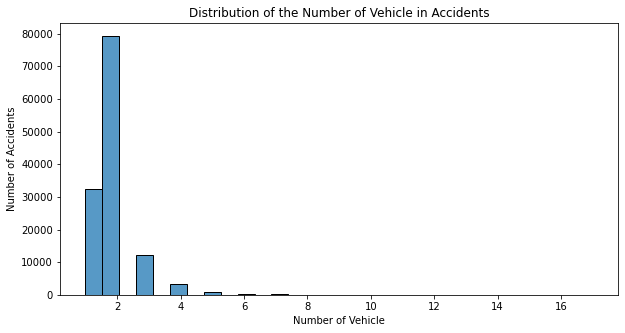

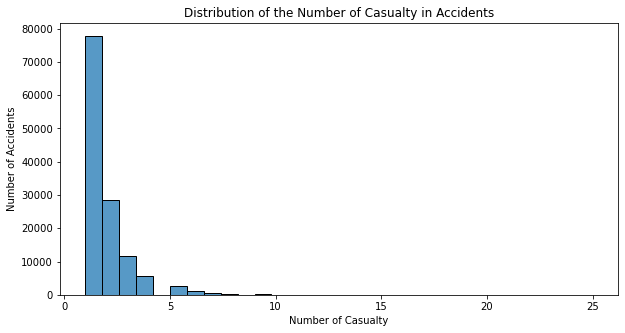

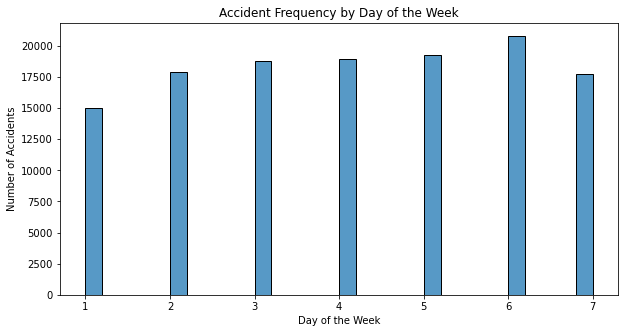

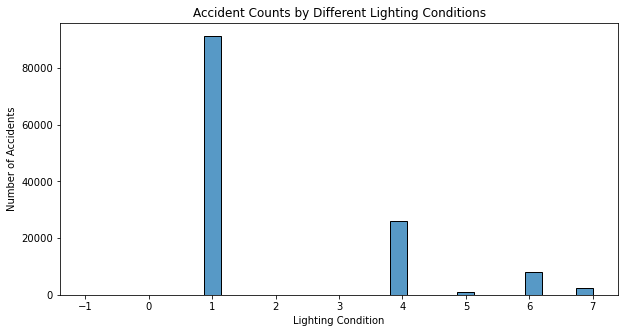

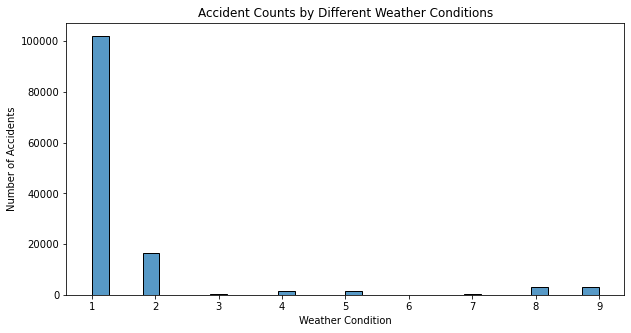

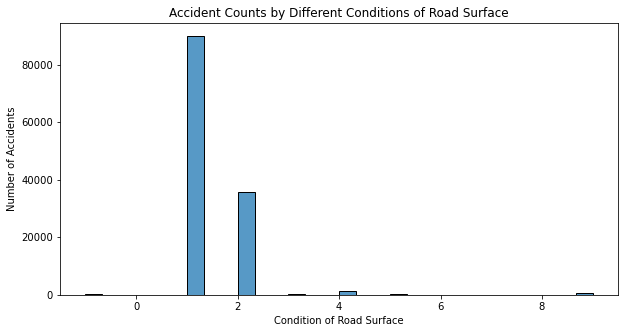

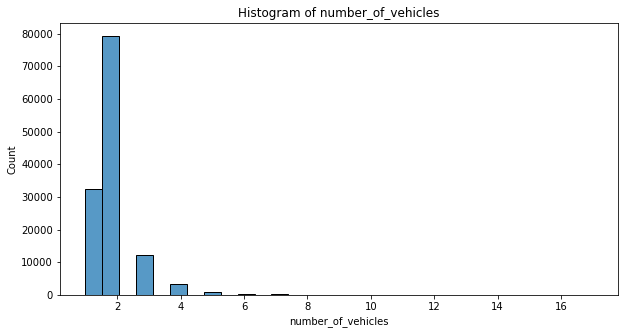

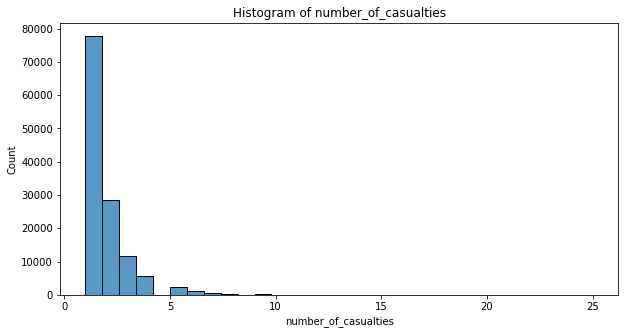

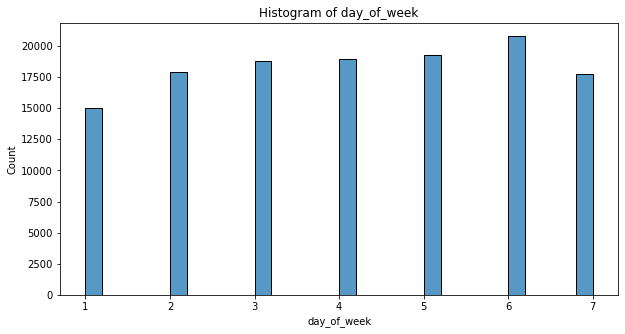

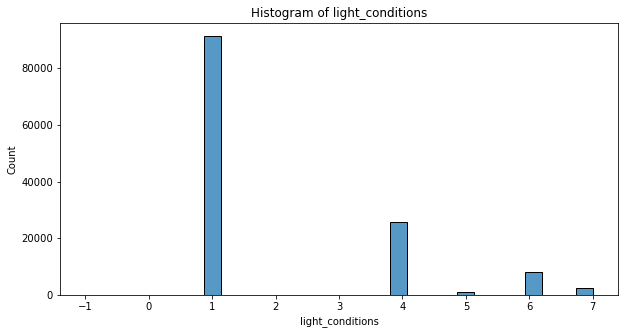

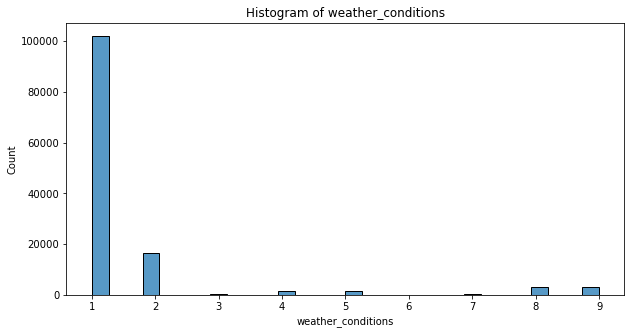

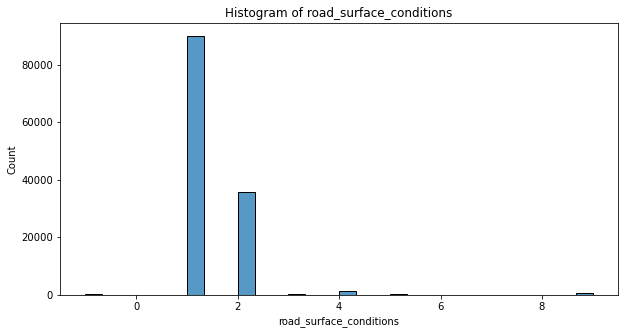

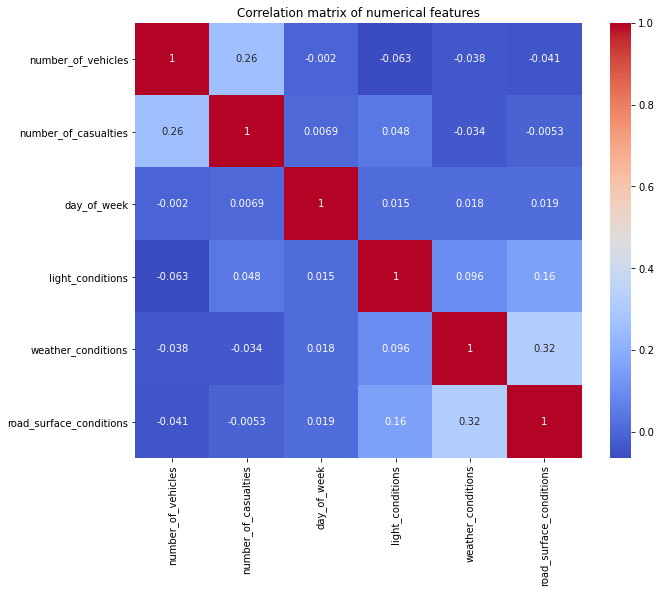

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of features for demonstration
subset_features = ['number_of_vehicles', 'number_of_casualties', 'day_of_week', 'light_conditions', 'weather_conditions', 'road_surface_conditions']

plt.figure(figsize=(10, 5))
sns.histplot(merged_df[subset_features[0]], bins=30, kde=False)
plt.title(f'Distribution of the Number of Vehicle in Accidents')
plt.xlabel('Number of Vehicle')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(merged_df[subset_features[1]], bins=30, kde=False)
plt.title(f'Distribution of the Number of Casualty in Accidents')
plt.xlabel('Number of Casualty')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(merged_df[subset_features[2]], bins=30, kde=False)
plt.title(f'Accident Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(merged_df[subset_features[3]], bins=30, kde=False)
plt.title(f'Accident Counts by Different Lighting Conditions')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(merged_df[subset_features[4]], bins=30, kde=False)
plt.title(f'Accident Counts by Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(merged_df[subset_features[5]], bins=30, kde=False)
plt.title(f'Accident Counts by Different Conditions of Road Surface')
plt.xlabel('Condition of Road Surface')
plt.ylabel('Number of Accidents')
plt.show()

# Plot histograms for numerical features
for feature in subset_features:
    if pd.api.types.is_numeric_dtype(merged_df[feature]):
        plt.figure(figsize=(10, 5))
        sns.histplot(merged_df[feature], bins=30, kde=False)
        plt.title(f'Histogram of {feature}')
        # plt.show()

# Plot bar charts for categorical features
for feature in subset_features:
    if pd.api.types.is_string_dtype(merged_df[feature]):
        plt.figure(figsize=(10, 5))
        merged_df[feature].value_counts().plot(kind='bar')
        plt.title(f'Bar chart of {feature}')
        
        plt.show()

# Plot a correlation matrix
numerical_features = [feature for feature in subset_features if pd.api.types.is_numeric_dtype(merged_df[feature])]
correlation_matrix = merged_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features')
plt.show()